In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
ls data

shoes_prices.csv


In [0]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.shape

(18280, 48)

In [0]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [0]:
[3] *5

[3, 3, 3, 3, 3]

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

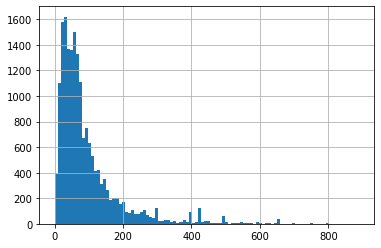

In [0]:
df['prices_amountmin'].hist(bins=100)

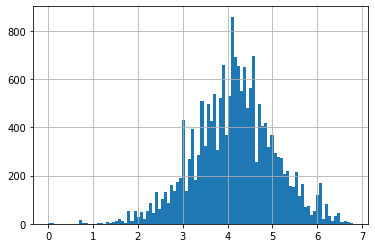

In [0]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.brand.value_counts()

Nike                       1709
PUMA                        574
Ralph Lauren                524
New Balance                 361
VANS                        356
                           ... 
Timberland Boot Company       1
J`S AWAKE                     1
PF-Flyers                     1
King Will                     1
Osiris Shoes                  1
Name: brand, Length: 1856, dtype: int64

In [0]:
df.brand.factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]
df.brand_cat

0           0
1           0
2           1
3           1
4           1
         ... 
18275    1855
18276     307
18277     411
18278     411
18279     411
Name: brand_cat, Length: 18280, dtype: int64

In [0]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth = 5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth = 5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
df.manufacturer.value_counts()

Puma                           476
Nike                           374
New Balance                    249
VANS                           170
Reebok                         128
                              ... 
Columbia Sportswear Company      1
Sebago                           1
2(x)ist                          1
South China Imports              1
Trask                            1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
df.colors.value_counts()

Black                                              1364
Brown                                               746
Blue                                                421
Multicolor                                          415
White                                               252
                                                   ... 
Black,Gold,White                                      1
LIGHT BONE BLACK                                      1
Black  Grey,Black  Red,Black  Yellow,Blue  Grey       1
Brown,Tan                                             1
Cyan,Citrus,Grey,Orange Flash                         1
Name: colors, Length: 2080, dtype: int64

In [0]:
df['categories_cat'] = df['categories'].factorize()[0]

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['categories_cat'])

(-59.82560591635895, 3.4214679298235415)

In [0]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.53930419908595, 4.311223231615436)

In [0]:
run_model(['brand_cat', 'categories_cat'])

(-58.489604578725846, 6.135642974334121)

In [0]:
run_model(['brand_cat', 'categories_cat', 'manufacturer_cat'])

(-58.32663007803053, 6.222206087396127)

In [0]:
feats = []
for kol in ['asins', 'brand', 'categories', 'colors', 'count', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight']:
  df[kol+'_cat'] = df[kol].factorize()[0]
  feats += [kol + '_cat']
  print(f"{kol:<20}: {str(run_model([kol + '_cat'])):<44}, : {str(run_model(['brand_cat', kol+'_cat'])):<44} : {run_model(feats)}")
      

asins               : (-65.89016871924788, 5.477326258777578)     , : (-58.45586598886003, 4.125746699054516)      : (-65.89016871924788, 5.477326258777578)
brand               : (-58.38655694633361, 4.223555478221712)     , : (-58.3865569463336, 4.223555478221714)       : (-58.45586598886003, 4.125746699054516)
categories          : (-59.82560591635895, 3.4214679298235415)    , : (-58.48960457872586, 6.135642974334111)      : (-58.247863501373466, 6.588216908596507)
colors              : (-62.72404880129134, 5.053649873215771)     , : (-61.446005821282085, 5.444747383187681)     : (-60.33767304372513, 5.092245777474325)
count               : (-64.00110841258031, 3.605273194168391)     , : (-58.38655694633361, 4.223555478221712)      : (-60.33767304372513, 5.092245777474317)
descriptions        : (-65.75006812541537, 6.362500434229668)     , : (-61.4612380292229, 6.52178458817128)        : (-63.224545636851886, 7.155122400713114)
dimension           : (-63.218177930422144, 4.4848528934

In [0]:
# string padding to fixed length
a = "John"
"{:<15}".format(a)

'John           '

In [0]:
# works also in f-string
a = "John"
f"{a:<20}"

'John                '